# Titanic Survival Estimator

This is a a simple Estimator based on a Decsion tree model which would predict the chance of survival in the 'Titanic' ship crash against the ice berg of 1912 using the given input parameters.

# Importing Libraries

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

# Loading Data

In [276]:
survival = pd.read_csv('C:/Users/LENOVO/# Jupyter Notebook Files/Machine Learning/Resources/py/ML/9_decision_tree/Exercise/titanic.csv')
survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleaning

* Detecting Null Values

In [277]:
survival.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [278]:
survival['Age'] = survival['Age'].fillna(survival['Age'].median())
survival['Embarked'] = survival['Embarked'].fillna('N') # N stands for Not Applicable
survival.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Null Values detected have been removed

* Removing Redudant features

In [279]:
survival.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [280]:
survival

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


* Converting Categorical data to Numerical data

In [281]:
sex_dummies = pd.get_dummies(survival['Sex'])
embarked_dummies = pd.get_dummies(survival['Embarked'])

sex_dummies.pop('male')
embarked_dummies.pop('N')

sex_dummies = pd.concat([sex_dummies,embarked_dummies],axis=1)
survival = pd.concat([survival,sex_dummies],axis=1)

survival.drop(['Sex','Embarked'],axis=1,inplace=True)
survival

,Survived,Pclass,Age,SibSp,Parch,Fare,female,C,Q,S
0,0,3,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,0,0


# Separating Independant variable from Dependant variables

In [282]:
y = survival.pop('Survived')
x = survival

# Train Test split

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.4)

# Model Creation

In [285]:
from sklearn.tree import DecisionTreeClassifier

In [286]:
survival_classifier = DecisionTreeClassifier()

# Training the Model

In [287]:
survival_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

# Testing the Model

In [288]:
survived = survival_classifier.predict(x_test)
survived

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

# Accuracy of the Model

In [289]:
score = survival_classifier.score(x_test,y_test)
print("The Model estimated the survival outcomes of the titanic crash with an accuracy of {}  %".format(int(score*100)))

The Model estimated the survival outcomes of the titanic crash with an accuracy of 80  %


# Confusion Matrix

In [290]:
from sklearn.metrics import confusion_matrix

In [291]:
confusion_matrix_values = confusion_matrix(y_test,survived)
confusion_matrix_values

array([[201,  29],
       [ 41,  86]], dtype=int64)

Text(36.0, 0.5, 'Truth')

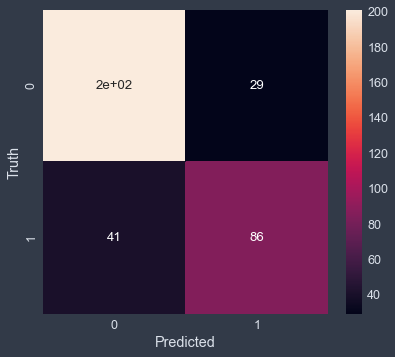

In [292]:
import seaborn as sns

sns.heatmap(confusion_matrix_values,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')